# NAND-gate

In [22]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [23]:
# Data
x_train = torch.tensor([[1, 1], [0, 0], [1, 0], [0, 1]]).float()
y_train = torch.tensor([[0], [0], [1], [1]]).float()

In [47]:
# Model
class SigmoidModel:

    def __init__(self):
        # Model variables

        self.W1 = torch.rand(2, 2, requires_grad=True)
        self.b1 = torch.rand(1, 2, requires_grad=True)
        self.W2 = torch.rand(2, 1, requires_grad=True)
        self.b2 = torch.rand(1, 1, requires_grad=True)
        # self.W1 = torch.tensor([[10.0, -10.0],
        #                         [10.0, -10.0]], requires_grad=True)
        # self.b1 = torch.tensor([[-5.0, 15.0]], requires_grad=True)
        # self.W2 = torch.tensor([[10.0], [10.0]], requires_grad=True)
        # self.b2 = torch.tensor([[-15.0]], requires_grad=True)

    # Predictor
    def f1(self, x):
        return torch.sigmoid(torch.Tensor(x) @ self.W1 + self.b1)

    def f2(self, x):
        return torch.sigmoid(torch.Tensor(x) @ self.W2 + self.b2)

    def f(self, x):
        return self.f2(self.f1(x))

    # Cross Entropy loss
    def loss(self, x, y):
        return -torch.mean(torch.multiply(y, torch.log(self.f(x))) + torch.multiply((1-y), torch.log(1-self.f(x))))


In [48]:
# Optimization
model = SigmoidModel()

print(model.W1.size())
print(model.b1.size())
print(model.W2.size())
print(model.b2.size())

optimizer = torch.optim.SGD([model.W1, model.W2, model.b1, model.b2], 0.01)

for epoch in range(10_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W1 = %s, W2 = %s, b1 = %s, b2 = %s, loss = %s" % (model.W1, model.W2, model.b1, model.b2, model.loss(x_train, y_train)))

torch.Size([2, 2])
torch.Size([1, 2])
torch.Size([2, 1])
torch.Size([1, 1])
W1 = tensor([[1.3493, 0.3226],
        [1.1858, 0.7165]], requires_grad=True), W2 = tensor([[ 0.9354],
        [-0.3535]], requires_grad=True), b1 = tensor([[0.2612, 0.3160]], requires_grad=True), b2 = tensor([[-0.4699]], requires_grad=True), loss = tensor(0.6795, grad_fn=<NegBackward0>)


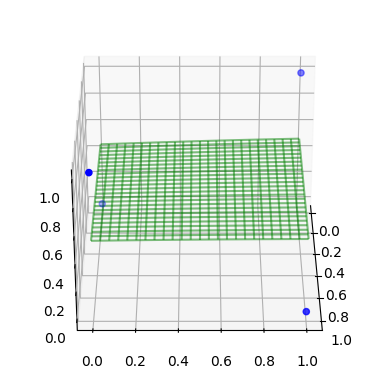

In [49]:
# Visualization
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 25), np.linspace(0, 1, 25))
z_grid = np.empty([25, 25])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue')
 
for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])

ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)
ax.view_init(30, 0)
plt.show()
